In [1]:
# !pip install tensorflow

import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.7.0'

In [2]:
!pip install pandas-datareader

In [3]:
import pandas_datareader as pdr

In [5]:
key = "888888888888888888888888888888888888"

# key = "copy and paste here your api key authentication"

In [6]:
dataset = pdr.get_data_tiingo('AAPL', api_key = key)

In [7]:
dataset.tail()

close      high  ...  divCash  splitFactor
symbol date                                         ...                      
AAPL   2021-12-03 00:00:00+00:00  161.84  164.9600  ...      0.0          1.0
       2021-12-06 00:00:00+00:00  165.32  167.8799  ...      0.0          1.0
       2021-12-07 00:00:00+00:00  171.18  171.5800  ...      0.0          1.0
       2021-12-08 00:00:00+00:00  175.08  175.9600  ...      0.0          1.0
       2021-12-09 00:00:00+00:00  174.56  176.7500  ...      0.0          1.0

[5 rows x 12 columns]

In [ ]:
# export the data
#dataset.to_csv('Aapledataset.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('Aapledataset.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-12-08 00:00:00+00:00,112.12,112.43,110.60,110.86,27068316,26.380961,26.453902,26.023317,26.084493,108273264,0.0,1.0
1,AAPL,2016-12-09 00:00:00+00:00,113.95,114.70,112.31,112.31,34402627,26.811546,26.988015,26.425667,26.425667,137610508,0.0,1.0
2,AAPL,2016-12-12 00:00:00+00:00,113.30,115.00,112.49,113.29,26374377,26.658606,27.058603,26.468019,26.656253,105497508,0.0,1.0
3,AAPL,2016-12-13 00:00:00+00:00,115.19,115.92,113.75,113.84,43733811,27.103308,27.275071,26.764487,26.785664,174935244,0.0,1.0
4,AAPL,2016-12-14 00:00:00+00:00,115.19,116.20,114.98,115.04,34031834,27.103308,27.340953,27.053897,27.068014,136127336,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-11-30 00:00:00+00:00,165.30,165.5200,159.92,159.985,174048056,165.30,165.5200,159.92,159.985,174048056,0.0,1.0
1253,AAPL,2021-12-01 00:00:00+00:00,164.77,170.3000,164.53,167.480,152423003,164.77,170.3000,164.53,167.480,152423003,0.0,1.0
1254,AAPL,2021-12-02 00:00:00+00:00,163.76,164.2000,157.80,158.735,136739174,163.76,164.2000,157.80,158.735,136739174,0.0,1.0
1255,AAPL,2021-12-03 00:00:00+00:00,161.84,164.9600,159.72,164.020,118023116,161.84,164.9600,159.72,164.020,118023116,0.0,1.0
1256,AAPL,2021-12-06 00:00:00+00:00,165.32,167.8799,164.28,164.290,107496982,165.32,167.8799,164.28,164.290,107496982,0.0,1.0


In [8]:
df = dataset.reset_index()['close']

In [9]:
df

0       113.30
1       115.19
2       115.19
3       115.82
4       115.97
         ...  
1253    161.84
1254    165.32
1255    171.18
1256    175.08
1257    174.56
Name: close, Length: 1258, dtype: float64

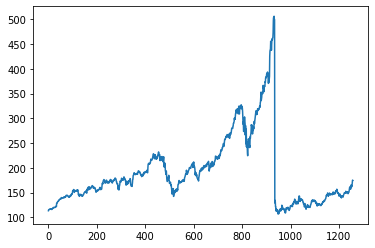

In [10]:
import matplotlib.pyplot as plt
plt.plot(df)

In [11]:
df

0       113.30
1       115.19
2       115.19
3       115.82
4       115.97
         ...  
1253    161.84
1254    165.32
1255    171.18
1256    175.08
1257    174.56
Name: close, Length: 1258, dtype: float64

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))

In [14]:
df1

array([[0.01618034],
       [0.02091421],
       [0.02091421],
       ...,
       [0.16115216],
       [0.17092048],
       [0.16961803]])

In [15]:
# Split the data into train and test 

training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size

train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1),:1]

In [16]:
training_size, test_size

(817, 441)

In [17]:
print(train_data)
print(test_data)

[[0.01618034]
 [0.02091421]
 [0.02091421]
 [0.02249217]
 [0.02286788]
 [0.02454602]
 [0.02532248]
 [0.025598  ]
 [0.02366938]
 [0.02424546]
 [0.02609894]
 [0.02484659]
 [0.02477145]
 [0.02249217]
 [0.02331872]
 [0.02299311]
 [0.02447088]
 [0.02772699]
 [0.03043206]
 [0.03073262]
 [0.03233563]
 [0.03108328]
 [0.03055729]
 [0.0329618 ]
 [0.03293676]
 [0.03241077]
 [0.0329618 ]
 [0.03316218]
 [0.03288666]
 [0.03767063]
 [0.03782091]
 [0.03784596]
 [0.03704446]
 [0.03634314]
 [0.0548779 ]
 [0.05432686]
 [0.05570445]
 [0.05873513]
 [0.06184095]
 [0.06311835]
 [0.06407013]
 [0.06331872]
 [0.06624922]
 [0.07058234]
 [0.07180964]
 [0.07139637]
 [0.07233563]
 [0.07479023]
 [0.07581716]
 [0.07436443]
 [0.07469004]
 [0.07536631]
 [0.07551659]
 [0.08252974]
 [0.08045085]
 [0.0825047 ]
 [0.08140263]
 [0.08185348]
 [0.08055103]
 [0.07974953]
 [0.08090169]
 [0.08105197]
 [0.08052599]
 [0.08420789]
 [0.08478397]
 [0.08303068]
 [0.08671259]
 [0.08265498]
 [0.0866124 ]
 [0.08536005]
 [0.08465874]
 [0.08

In [18]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step = 1):
  dataX, dataY = [],[]

  for i in range(len(dataset)- time_step - 1):
    a = dataset[i:(i+time_step), 0] # i = 0, 1 ,2 , 3 ....100
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [19]:
# Reshape into X = t, t+1, t+2, t+3  and Y = t+4

time_step = 100

X_train, y_train = create_dataset(train_data, time_step)

X_test, y_test = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [21]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [22]:
# X.shape[0] - sample dataset
# X.shape[1] - timesteps
# n_features - features

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [23]:
# Now we have to build LSTM Model to predict Future share value for the given Stock market dataset (Apple)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1 )

Epoch 1/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0040 - val_loss: 0.0254
Epoch 2/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0016 - val_loss: 0.0225
Epoch 3/100
12/12 [==============================] - 1s 86ms/step - loss: 9.3363e-04 - val_loss: 0.0236
Epoch 4/100
12/12 [==============================] - 1s 85ms/step - loss: 7.6006e-04 - val_loss: 0.0221
Epoch 5/100
12/12 [==============================] - 1s 85ms/step - loss: 7.1538e-04 - val_loss: 0.0207
Epoch 6/100
12/12 [==============================] - 1s 85ms/step - loss: 7.0957e-04 - val_loss: 0.0216
Epoch 7/100
12/12 [==============================] - 1s 85ms/step - loss: 7.5408e-04 - val_loss: 0.0211
Epoch 8/100
12/12 [==============================] - 1s 85ms/step - loss: 6.6787e-04 - val_loss: 0.0207
Epoch 9/100
12/12 [==============================] - 1s 85ms/step - loss: 6.3682e-04 - val_loss: 0.0195
Epoch 10/100
12/12 [==============================] - 1s 85ms/step - lo

In [28]:
# Lets do the prediction and check performance matrix

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [29]:
train_predict

array([[0.10434908],
       [0.10648947],
       [0.10925354],
       [0.11221859],
       [0.11512531],
       [0.11804449],
       [0.12074431],
       [0.12300716],
       [0.12393201],
       [0.12389766],
       [0.12332413],
       [0.12265374],
       [0.12205304],
       [0.12152202],
       [0.12115716],
       [0.1209222 ],
       [0.12079789],
       [0.12061772],
       [0.12042713],
       [0.12059992],
       [0.12090247],
       [0.12130545],
       [0.12188698],
       [0.12252661],
       [0.12221261],
       [0.12039854],
       [0.11761907],
       [0.11424035],
       [0.11062921],
       [0.10689706],
       [0.10394607],
       [0.10181711],
       [0.10057981],
       [0.10006674],
       [0.10017086],
       [0.10063132],
       [0.10095794],
       [0.1013226 ],
       [0.1014343 ],
       [0.10132157],
       [0.10098215],
       [0.10058013],
       [0.10001264],
       [0.09953373],
       [0.09934539],
       [0.09951203],
       [0.09998212],
       [0.100

In [30]:
test_predict

array([[ 7.00961173e-01],
       [ 7.27167428e-01],
       [ 7.52405643e-01],
       [ 7.69911706e-01],
       [ 7.81725883e-01],
       [ 7.84357190e-01],
       [ 7.85169423e-01],
       [ 7.87281394e-01],
       [ 7.89668739e-01],
       [ 7.91236043e-01],
       [ 7.92929590e-01],
       [ 7.94444859e-01],
       [ 7.98462212e-01],
       [ 8.10442328e-01],
       [ 8.27083766e-01],
       [ 8.42457354e-01],
       [ 8.56334805e-01],
       [ 8.65337312e-01],
       [ 8.69642317e-01],
       [ 7.63011038e-01],
       [ 6.04272783e-01],
       [ 4.42936391e-01],
       [ 3.05185378e-01],
       [ 1.99317113e-01],
       [ 1.17494598e-01],
       [ 5.35053797e-02],
       [ 2.18474399e-03],
       [-3.65170464e-02],
       [-6.08883612e-02],
       [-7.18115792e-02],
       [-7.24084154e-02],
       [-6.60272613e-02],
       [-5.58705740e-02],
       [-4.37295772e-02],
       [-3.08937915e-02],
       [-1.88831165e-02],
       [-8.35422706e-03],
       [ 8.05215444e-04],
       [ 8.8

In [31]:
# Transform / Change the value into original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [32]:
train_predict

array([[148.50137],
       [149.35593],
       [150.45947],
       [151.64328],
       [152.80377],
       [153.96927],
       [155.04716],
       [155.9506 ],
       [156.31985],
       [156.30615],
       [156.07716],
       [155.8095 ],
       [155.56967],
       [155.35767],
       [155.212  ],
       [155.1182 ],
       [155.06856],
       [154.99663],
       [154.92053],
       [154.98952],
       [155.11032],
       [155.2712 ],
       [155.50337],
       [155.75876],
       [155.63339],
       [154.90912],
       [153.79941],
       [152.45045],
       [151.00871],
       [149.51865],
       [148.34047],
       [147.49048],
       [146.99649],
       [146.79164],
       [146.83322],
       [147.01706],
       [147.14746],
       [147.29305],
       [147.33765],
       [147.29265],
       [147.15714],
       [146.99661],
       [146.77005],
       [146.57884],
       [146.50365],
       [146.57019],
       [146.75786],
       [147.13257],
       [147.71452],
       [148.4518 ],


In [33]:
test_predict

array([[386.69873 ],
       [397.1616  ],
       [407.23795 ],
       [414.22726 ],
       [418.94406 ],
       [419.9946  ],
       [420.3189  ],
       [421.16208 ],
       [422.11526 ],
       [422.74097 ],
       [423.41714 ],
       [424.02213 ],
       [425.62604 ],
       [430.4091  ],
       [437.05322 ],
       [443.1911  ],
       [448.73166 ],
       [452.32593 ],
       [454.0447  ],
       [411.47217 ],
       [348.0959  ],
       [283.68234 ],
       [228.68526 ],
       [186.41736 ],
       [153.74971 ],
       [128.20201 ],
       [107.712265],
       [ 92.26057 ],
       [ 82.53032 ],
       [ 78.16923 ],
       [ 77.93094 ],
       [ 80.478615],
       [ 84.533676],
       [ 89.38097 ],
       [ 94.50565 ],
       [ 99.30091 ],
       [103.50457 ],
       [107.161476],
       [110.37689 ],
       [113.12007 ],
       [115.43429 ],
       [117.36955 ],
       [118.78126 ],
       [119.81365 ],
       [120.41867 ],
       [120.72955 ],
       [120.84586 ],
       [120.9

In [34]:
len(test_predict)

340

In [36]:
# Calculate the RMSE performance matrics for training and test dataset

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))



200.89587704531644

In [37]:
math.sqrt(mean_squared_error(y_test, test_predict))

169.36769820083376

In [ ]:
# Plot the data to validate forcasting

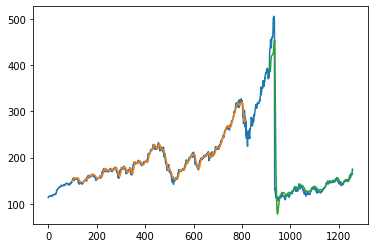

In [40]:
look_back = 100

# Training Prediction
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Test Prediction
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Visulise the data to identify train data, test data and predicted/future forcasting data

import matplotlib.pyplot as plt

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [41]:
len(test_data)

441

In [ ]:
# LSTM method to predict Time Series Forecasting for AAPL complany share value

In [ ]:
dataset1 = pdr.get_data_tiingo('GOOG', api_key = key)

In [ ]:
dataset1.tail()

close       high      low      open  \
symbol date                                                               
GOOG   2021-11-30 00:00:00+00:00  2849.04  2932.5700  2841.32  2909.005   
       2021-12-01 00:00:00+00:00  2832.36  2929.9825  2830.00  2884.250   
       2021-12-02 00:00:00+00:00  2875.53  2893.5000  2819.64  2836.480   
       2021-12-03 00:00:00+00:00  2850.41  2904.2599  2823.00  2889.910   
       2021-12-06 00:00:00+00:00  2875.93  2887.0300  2812.94  2871.480   

                                   volume  adjClose    adjHigh   adjLow  \
symbol date                                                               
GOOG   2021-11-30 00:00:00+00:00  2079526   2849.04  2932.5700  2841.32   
       2021-12-01 00:00:00+00:00  1427289   2832.36  2929.9825  2830.00   
       2021-12-02 00:00:00+00:00  1062535   2875.53  2893.5000  2819.64   
       2021-12-03 00:00:00+00:00  1334374   2850.41  2904.2599  2823.00   
       2021-12-06 00:00:00+00:00  1109885   2875.93  2887.0300  2812.94   

                                   adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                  
GOOG   2021-11-30 00:00:00+00:00  2909.005    2079526      0.0          1.0  
       2021-12-01 00:00:00+00:00  2884.250    1427289      0.0          1.0  
       2021-12-02 00:00:00+00:00  2836.480    1062535      0.0          1.0  
       2021-12-03 00:00:00+00:00  2889.910    1334374      0.0          1.0  
       2021-12-06 00:00:00+00:00  2871.480    1109885      0.0          1.0

In [ ]:
dataset2 = dataset1.reset_index()['close']

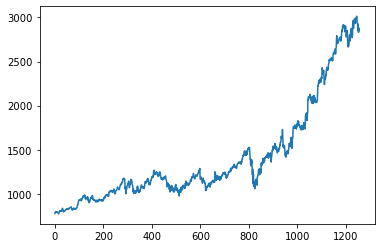

In [ ]:
plt.plot(dataset2)

# Basic of TimeSeries Forecasting - LSTM Model

### Simple Univariate TSF Approach

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
# Preparing independent and dependent features :
def prepare_data(timeseries_data, n_features):
    X, y = [],[]
    for i in range(len(timeseries_data)):
        end_ix = i + n_features
        if end_ix > len(timeseries_data)-1:
            break
            
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)        

In [ ]:
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
n_steps=3
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
print(X)
print(y)
print(X.shape)

[[[110]
  [125]
  [133]]

 [[125]
  [133]
  [146]]

 [[133]
  [146]
  [158]]

 [[146]
  [158]
  [172]]

 [[158]
  [172]
  [187]]

 [[172]
  [187]
  [196]]]
[146 158 172 187 196 210]
(6, 3, 1)


In [ ]:
n_features = 1

# X.shape[0] - sample dataset
# X.shape[1] - timesteps
# n_features - features
X = X.reshape(X.shape[0], X.shape[1],n_features)

# Build LSTM Model 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', 
               return_sequences = True, 
               input_shape=(n_steps, n_features)))

# n_steps - timesteps (i am taking three dataset)
# n_features - output value

model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X, y, epochs = 500, verbose=1)

Epoch 1/500
1/1 [==============================] - 0s 8ms/step - loss: 1.5029
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 1.5021
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 1.3158
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 1.2523
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 1.3433
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 1.4368
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 1.4074
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 1.2383
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 1.2227
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 1.3339
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 1.3569
Epoch 12/500
1/1 [==============================] - 0s 7ms/step - loss: 1.2366
Epoch 13/500
1/1 [==============================] - 0s 6ms/s

1/1 [==============================] - 0s 6ms/step - loss: 0.5065
Epoch 207/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3826
Epoch 208/500
1/1 [==============================] - 0s 8ms/step - loss: 0.4211
Epoch 209/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5954
Epoch 210/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6710
Epoch 211/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5254
Epoch 212/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3930
Epoch 213/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5046
Epoch 214/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5986
Epoch 215/500
1/1 [==============================] - 0s 9ms/step - loss: 0.4282
Epoch 216/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3826
Epoch 217/500
1/1 [==============================] - 0s 7ms/step - loss: 0.4535
Epoch 218/500
1/1 [==============================] - 

1/1 [==============================] - 0s 6ms/step - loss: 0.1342
Epoch 411/500
1/1 [==============================] - 0s 8ms/step - loss: 0.1046
Epoch 412/500
1/1 [==============================] - 0s 8ms/step - loss: 0.1001
Epoch 413/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1169
Epoch 414/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1290
Epoch 415/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1414
Epoch 416/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1400
Epoch 417/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1322
Epoch 418/500
1/1 [==============================] - 0s 8ms/step - loss: 0.1175
Epoch 419/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0989
Epoch 420/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0882
Epoch 421/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0936
Epoch 422/500
1/1 [==============================] - 0

In [ ]:
# Predicting the next data

In [ ]:
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lst_output = []

i = 0
while(i<10):
    if(len(temp_input)>3):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1,n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        
        lst_output.append(yhat[0][0])
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i = i+1
        

        print(lst_output)

[225.61699]
1 day input [196.         210.         225.61698914]
1 day output [[236.79094]]
2 day input [210.         225.61698914 236.79093933]
2 day output [[251.97925]]
3 day input [225.61699 236.79094 251.97925]
3 day output [[268.22656]]
4 day input [236.79094 251.97925 268.22656]
4 day output [[282.02435]]
5 day input [251.97925 268.22656 282.02435]
5 day output [[298.86478]]
6 day input [268.22656 282.02435 298.86478]
6 day output [[316.43314]]
7 day input [282.02435 298.86478 316.43314]
7 day output [[333.14484]]
8 day input [298.86478 316.43314 333.14484]
8 day output [[352.23666]]
9 day input [316.43314 333.14484 352.23666]
9 day output [[372.05588]]
[225.61699, 236.79094, 251.97925, 268.22656, 282.02435, 298.86478, 316.43314, 333.14484, 352.23666, 372.05588]


In [ ]:
lst_output

[225.61699,
 236.79094,
 251.97925,
 268.22656,
 282.02435,
 298.86478,
 316.43314,
 333.14484,
 352.23666,
 372.05588]

In [ ]:
# visualise the output
import matplotlib.pyplot as plt

In [ ]:
day_new = np.arange(1,10)
day_pred = np.arange(10,20)

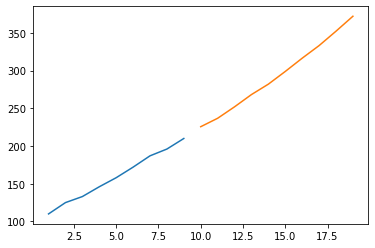

In [ ]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)

In [ ]:
# Completed
# DNN
    # Classification problem
    # FP,BP,ACT,LOSS, Vanishing gradient, Weight, Dropout, chain rule, memoization etc
# CNN - pooling concept, padding, strides, VGG16, Alexnat, Lenat, Transfer Learning

# Computer Vision - Face detection, Video, Face recognition 

# RNN - Types of RNN, LSTM

# NLP - Tokenization, Lem, stem, BOW, TF-IDF, W2V, NLTK, Spacy, Text to speech, Speech to Text , case study 


# Pending :

# 1) GANS - this is not there in syllbus

# 2) BERT + GPT3 - 2020 - this is not there in syllbus

# 3) BOTs - this is not there in syllbus

# 4) one session on CNN - with case study -

# 5) Camera Calibration and 3D Reconstruct...
